In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action = "ignore")


from sklearn import tree
from scipy import stats
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm







In [7]:
cat_columns = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]

cont_columns = ["age","duration","campaign","pdays","emp.var.rate","cons.price.idx",
               "cons.conf.idx" ,"euribor3m","nr.employed" ,"previous"]

df = pd.read_csv("processed_data.csv")

df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.053070,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,0.493827,0.030297,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,0.246914,0.045954,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,0.283951,0.030704,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,0.481481,0.062424,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40770,0.691358,0.067914,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes
40771,0.358025,0.077877,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40772,0.481481,0.038430,0.018182,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40773,0.333333,0.089874,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes


# Feature selection 

Using chi-squared test for catagorical features

In [8]:
independentCol = []

for column in df.columns:
    nl = "\n"
    crosstab = pd.crosstab(df[column], df['y'])
    print(column, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    alpha = 0.05
    if p <= alpha:
        print('Dependent (reject H0)',nl)
    else:
        independentCol.append(column)
        print('Independent (H0 holds true)',nl)
    print('--------------------------------')
    

age 

Chi2 value= 1634.4676740013583
p-value= 2.4322882839614612e-290
Degrees of freedom= 77

Dependent (reject H0) 

--------------------------------
duration 

Chi2 value= 10397.362786978574
p-value= 0.0
Degrees of freedom= 1539

Dependent (reject H0) 

--------------------------------
campaign 

Chi2 value= 216.31422758140374
p-value= 1.1077319382646038e-25
Degrees of freedom= 41

Dependent (reject H0) 

--------------------------------
pdays 

Chi2 value= 4430.411015395915
p-value= 0.0
Degrees of freedom= 25

Dependent (reject H0) 

--------------------------------
previous 

Chi2 value= 2252.812018702605
p-value= 0.0
Degrees of freedom= 7

Dependent (reject H0) 

--------------------------------
emp.var.rate 

Chi2 value= 5732.47777072685
p-value= 0.0
Degrees of freedom= 9

Dependent (reject H0) 

--------------------------------
cons.price.idx 

Chi2 value= 7578.558251545135
p-value= 0.0
Degrees of freedom= 25

Dependent (reject H0) 

--------------------------------
cons.conf.id

poutcome_nonexistent 

Chi2 value= 1510.4108838766135
p-value= 0.0
Degrees of freedom= 1

Dependent (reject H0) 

--------------------------------
poutcome_success 

Chi2 value= 4115.921472443226
p-value= 0.0
Degrees of freedom= 1

Dependent (reject H0) 

--------------------------------
y 

Chi2 value= 40764.99603222278
p-value= 0.0
Degrees of freedom= 1

Dependent (reject H0) 

--------------------------------


In [9]:
selected_df = df.copy()
selected_df.drop(independentCol, axis=1, inplace=True)
selected_df


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.053070,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no
1,0.493827,0.030297,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no
2,0.246914,0.045954,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no
3,0.283951,0.030704,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no
4,0.481481,0.062424,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40770,0.691358,0.067914,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes
40771,0.358025,0.077877,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40772,0.481481,0.038430,0.018182,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40773,0.333333,0.089874,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes


# Recursive Feature Elimination for Random Forest 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

for_df = df.copy()
for_df.drop('y', axis=1, inplace=True)

target = df['y'].copy()
target = target.replace(['no'],'False')
target = target.replace(['yes'],'True')

clf_forest = RandomForestClassifier()

rfe1 = RFE(clf_forest, n_features_to_select=40, verbose=2)

rfe1 = rfe1.fit(for_df, target)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.


In [10]:
randomforest_col = []

for index,rank in enumerate(rfe1.ranking_):
    if rank != 1 :         
        randomforest_col.append(df.columns[index])
    
forest_df = df.copy()
forest_df.drop(randomforest_col, axis=1, inplace=True)
forest_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.053070,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,0.493827,0.030297,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,0.246914,0.045954,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,0.283951,0.030704,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,0.481481,0.062424,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40770,0.691358,0.067914,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes
40771,0.358025,0.077877,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40772,0.481481,0.038430,0.018182,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40773,0.333333,0.089874,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes


# Custom Evaluation Techniques 

In [11]:
def find_conf_matrix(y_true,y_pred):
    TP = sum((y_true == 'yes') & (y_pred == 'yes'))
    FN = sum((y_true == 'yes') & (y_pred == 'no'))
    FP = sum((y_true == 'no') & (y_pred == 'yes'))
    TN = sum((y_true == 'no') & (y_pred == 'no'))
    return TP,FN,FP,TN

def my_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])

In [12]:
def my_accuracy_score(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix(y_true,y_pred)  
    return (TP+TN)/(TP+FN+FP+TN)

In [13]:
def my_recall_score(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix(y_true,y_pred)  
    return [ TP/(TP+FN) , TN/(FP+TN)]

In [14]:
def my_precision_score(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix(y_true,y_pred)  
    return [ TP/(TP+FP) , TN/(FN+TN) ]

In [15]:
def my_f1_score(y_true, y_pred):
    recall = my_recall_score(y_true,y_pred)  
    precision = my_precision_score(y_true,y_pred)  
    return [(2*precision[0]*recall[0])/(recall[0]+precision[0]),(2*precision[1]*recall[1])/(recall[1]+precision[1])]

In [16]:
def my_classification_report(y_true, y_pred):
    print('Accuracy for the model',my_accuracy_score(y_true,y_pred))
    print('Recall for yes and no ',my_recall_score(y_true,y_pred))
    print('Precision for yes and no ',my_precision_score(y_true,y_pred))
    print('F1 for yes and no',my_f1_score(y_true,y_pred))

# Model evaluation 

Splitting 33% data for training

In [17]:

y = selected_df['y']
X = selected_df.drop(['y'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)



## Naive Bayes algorithm

In [18]:
clf_gau = GaussianNB()

clf_gau.fit(X_train, y_train)

y_pred = clf_gau.predict(X_test)

gau_acc = my_accuracy_score(y_test, y_pred)

print("Accuracy of gaussian model is",gau_acc)

Accuracy of gaussian model is 0.8617717003567182


### Confusion matrix  

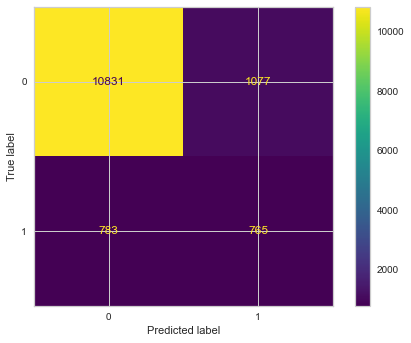

In [19]:
c_matrix = my_confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c_matrix).plot()
plt.show()

In [20]:
print(my_classification_report(y_test, y_pred))

Accuracy for the model 0.8617717003567182
Recall for yes and no  [0.4941860465116279, 0.9095566006046355]
Precision for yes and no  [0.4153094462540717, 0.9325813673153092]
F1 for yes and no [0.4513274336283186, 0.9209250914037921]
None


## Logistic regression

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.9086652794292509


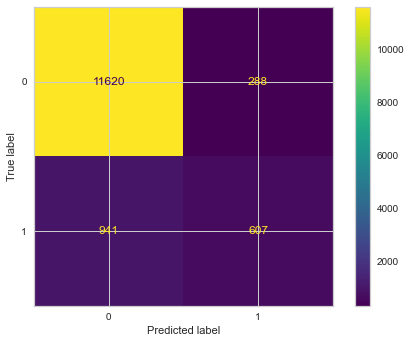

In [23]:
c_matrix = my_confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c_matrix).plot()
plt.show()

In [24]:
print(my_classification_report(y_test, y_pred))

Accuracy for the model 0.9086652794292509
Recall for yes and no  [0.3921188630490956, 0.9758145784346658]
Precision for yes and no  [0.6782122905027933, 0.9250855823580925]
F1 for yes and no [0.4969300040933279, 0.9497731823940496]
None


### Hyperparameters Tuning 

In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                   
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10)
clf.fit(X_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.9114168542620839


In [23]:
logreg = LogisticRegression(C = 100.0, 
                            penalty = 'l2', 
                            solver = 'lbfgs')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))


Accuracy: 0.9083680142687277


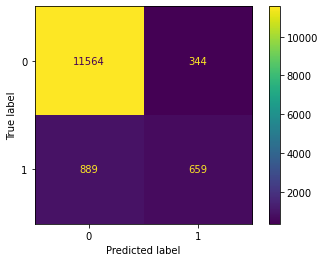

In [24]:
c_matrix = my_confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c_matrix).plot()
plt.show()

In [25]:
print(my_classification_report(y_test, y_pred))

Accuracy for the model 0.9083680142687277
Recall for yes and no  [0.4257105943152455, 0.9711118575747397]
Precision for yes and no  [0.6570289132602194, 0.9286115795390669]
F1 for yes and no [0.5166601332810662, 0.9493863141907146]
None


# AdaBoost 

In [25]:
clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=4)

fit_ada = clf_ada.fit(X_train, y_train)

y_pred_ada = clf_ada.predict(X_test)

ada_acc = my_accuracy_score(y_test, y_pred_ada)

print("Accuracy of AdaBoost model is",ada_acc)

Accuracy of AdaBoost model is 0.8987068965517241


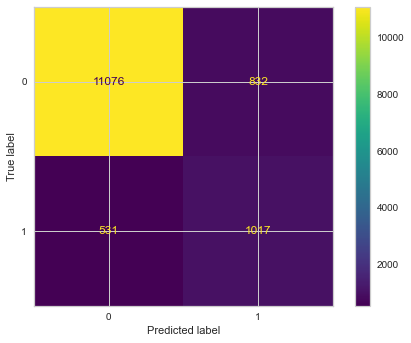

In [26]:
c_matrix = my_confusion_matrix(y_test, y_pred_ada)
ConfusionMatrixDisplay(c_matrix).plot()
plt.show()

In [27]:
print(my_classification_report(y_test, y_pred_ada))

Accuracy for the model 0.8987068965517241
Recall for yes and no  [0.6569767441860465, 0.9301310043668122]
Precision for yes and no  [0.550027041644132, 0.954251744636857]
F1 for yes and no [0.5987636149543715, 0.9420369976610673]
None


# Support Vector Machine

In [30]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
svm_acc = my_accuracy_score(y_test, y_pred_ada)
print("Accuracy of SVM model is",svm_acc)

Accuracy of SVM model is 0.8987068965517241


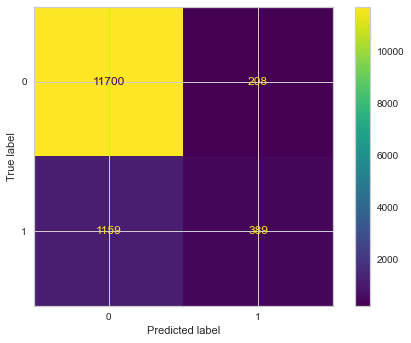

In [31]:
c_matrix = my_confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c_matrix).plot()
plt.show()

In [32]:
print(my_classification_report(y_test, y_pred))

Accuracy for the model 0.898409631391201
Recall for yes and no  [0.25129198966408267, 0.982532751091703]
Precision for yes and no  [0.6515912897822446, 0.9098685745392332]
F1 for yes and no [0.36270396270396266, 0.9448055880809141]
None


# Random Forest 

We are using the df obtained from RFE 

In [29]:
y = forest_df['y']
X = forest_df.drop(['y'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [30]:
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [31]:
my_accuracy_score(y_test, y_pred)

0.9080707491082045

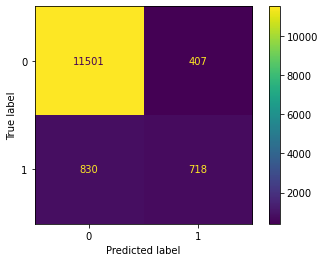

In [32]:
c_matrix = my_confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c_matrix).plot()
plt.show()

In [33]:
print(my_classification_report(y_test, y_pred))

Accuracy for the model 0.9080707491082045
Recall for yes and no  [0.46382428940568476, 0.9658212966073229]
Precision for yes and no  [0.6382222222222222, 0.9326899683723948]
F1 for yes and no [0.5372240927796483, 0.9489665415239902]
None


### Hyperparameters Tuning 

In [34]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_



{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [36]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

rfc1.fit(X_train, y_train)

y_pred=rfc1.predict(X_test)

print("Accuracy for Random Forest on CV data: ",my_accuracy_score(y_test,y_pred))


Accuracy for Random Forest on CV data:  0.904577883472057


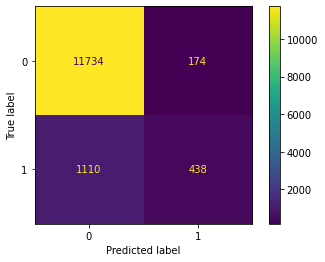

In [37]:
c_matrix = my_confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c_matrix).plot()
plt.show()

In [38]:
print(my_classification_report(y_test, y_pred))

Accuracy for the model 0.904577883472057
Recall for yes and no  [0.28294573643410853, 0.985387974470944]
Precision for yes and no  [0.7156862745098039, 0.9135783245094986]
F1 for yes and no [0.40555555555555556, 0.948125404007757]
None
